In [34]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# the equation is  : 4x+2 = 0
unknownvalue = tf.Variable(0.0)

a = tf.constant(4.0)
b = tf.constant(2.0)

In [13]:
c = tf.multiply(unknownvalue,a)  # 4x
equation  = tf.add(c,b) # 4x+2

In [14]:
zerovalue = tf.constant(0.0)
diff = tf.square(equation-zerovalue) # differnce is : 4x+2  -  0 

In [15]:

solving = tf.train.GradientDescentOptimizer(0.01).minimize(diff)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [16]:
for n in range(1000):
    sess.run(solving)

In [17]:
print(sess.run(unknownvalue))

-0.49999997


### Example 2

In [18]:
# the equation is  : x**2 + 7x+ 12 = 0

unknownvalue = tf.Variable(0.0)
a = tf.constant(7.0)
b = tf.constant(12.0)
c = tf.multiply(unknownvalue,a)
d = tf.pow(unknownvalue,2)
e = tf.add(c,d)
equation  = tf.add(e,b)

In [19]:
zerovalue = tf.constant(0.0)
diff = tf.square(equation-zerovalue)
solving = tf.train.GradientDescentOptimizer(0.01).minimize(diff)
init = tf.global_variables_initializer()

In [20]:
sess = tf.Session()
sess.run(init)
for n in range(1000):
    sess.run(solving)
  
print(sess.run(unknownvalue))                               

-2.9999933


### Example 3

In [21]:
#  X = [0,1,2,3,4,5]
#  y = [9,7,5,3,1,-1]


w = tf.Variable([5.0],tf.float32)
b = tf.Variable([7.0],tf.float32)

x = tf.placeholder(tf.float32)

LinearRegressionModel = w*x + b

In [22]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

print(sess.run(LinearRegressionModel,{x:[0,1,2,3,4,5]}))

y = tf.placeholder(tf.float32)

[ 7. 12. 17. 22. 27. 32.]


In [23]:
SquaredDiff = tf.square(LinearRegressionModel -y )

TotalLoss = tf.reduce_sum(SquaredDiff)
    
print (sess.run(TotalLoss , {x:[0,1,2,3,4,5] , y:[9,7,5,3,1,-1]}) )

2299.0


In [24]:
GDO  = tf.train.GradientDescentOptimizer(0.01)

model = GDO.minimize(TotalLoss)

In [25]:
for i in range(10000) : 
    sess.run(model , {x:[0,1,2,3,4,5] , y:[9,7,5,3,1,-1]})
    
print(sess.run([w,b]))

[array([-1.9999969], dtype=float32), array([8.999989], dtype=float32)]


### Linear Regression 1

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
np.random.seed(101) 
tf.set_random_seed(101)

# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 

# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 

n = len(x) # Number of data points

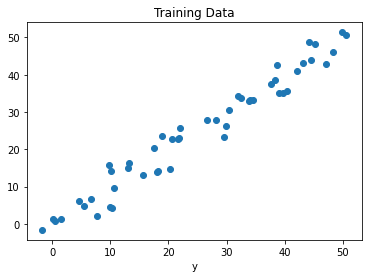

In [38]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show()

In [39]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

W = tf.Variable(np.random.randn()) 
b = tf.Variable(np.random.randn())

In [40]:
learning_rate = 0.01
training_epochs = 1000

In [41]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b)

In [42]:
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)

In [43]:
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [44]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
	
	# Initializing the Variables 
	sess.run(tf.global_variables_initializer()) 
	
	# Iterating through all the epochs 
	for epoch in range(training_epochs): 
		
		# Feeding each data point into the optimizer using Feed Dictionary 
		for (_x, _y) in zip(x, y): 
			sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
		# Displaying the result after every 50 epochs 
		if (epoch + 1) % 50 == 0: 
			# Calculating the cost a every epoch 
			c = sess.run(cost, feed_dict = {X : x, Y : y}) 
			print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
	
	# Storing necessary values to be used outside the Session 
	training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
	weight = sess.run(W) 
	bias = sess.run(b)


Epoch 50 : cost = 5.8868036 W = 0.9951241 b = 1.238105
Epoch 100 : cost = 5.79127 W = 0.99812365 b = 1.0914395
Epoch 150 : cost = 5.7119684 W = 1.0008028 b = 0.96044284
Epoch 200 : cost = 5.6459413 W = 1.0031956 b = 0.84343934
Epoch 250 : cost = 5.5907993 W = 1.0053328 b = 0.7389355
Epoch 300 : cost = 5.544608 W = 1.007242 b = 0.6455921
Epoch 350 : cost = 5.5057893 W = 1.008947 b = 0.56221986
Epoch 400 : cost = 5.473066 W = 1.01047 b = 0.48775342
Epoch 450 : cost = 5.445385 W = 1.0118302 b = 0.42124158
Epoch 500 : cost = 5.4219036 W = 1.0130452 b = 0.36183482
Epoch 550 : cost = 5.4019227 W = 1.0141305 b = 0.30877408
Epoch 600 : cost = 5.3848557 W = 1.0150996 b = 0.2613811
Epoch 650 : cost = 5.370246 W = 1.0159653 b = 0.21905078
Epoch 700 : cost = 5.3576994 W = 1.0167387 b = 0.18124203
Epoch 750 : cost = 5.3468933 W = 1.0174294 b = 0.14747237
Epoch 800 : cost = 5.337558 W = 1.0180461 b = 0.11730931
Epoch 850 : cost = 5.3294754 W = 1.0185971 b = 0.090368524
Epoch 900 : cost = 5.322459 W 

In [45]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 5.3110332 Weight = 1.0199214 bias = 0.02561658 



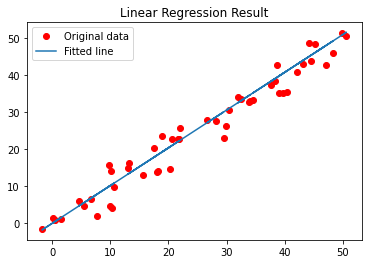

In [46]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show()

### Logistic Regression

In [47]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\olaab\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


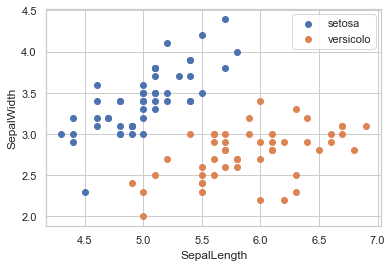

In [48]:
iris = pd.read_csv('dataset.csv')
iris = iris[:100]

iris.Species = iris.species.replace(to_replace=['setosa', 'versicolor'], value=[0, 1])
plt.scatter(iris[:50].sepal_length, iris[:50].sepal_width, label='setosa')
plt.scatter(iris[51:].sepal_length, iris[51:].sepal_width, label='versicolo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')

In [49]:
X = iris.drop(labels=['species'], axis=1).values
y = iris.Species.values

In [50]:
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)
# set replace=False, Avoid double sampling
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)
# diff set
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [51]:
# Define the normalized function
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

# Normalized processing, must be placed after the data set segmentation, 
# otherwise the test set will be affected by the training set
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

In [52]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, A's dimension is (4, 1)
A = tf.Variable(tf.random_normal(shape=[4, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [53]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [54]:
# Declare the model you need to learn
mod = tf.matmul(data, A) + b

In [55]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [56]:
# Define the learning rate， batch_size etc.
learning_rate = 0.003
batch_size = 30
iter_num = 1500

In [57]:
# Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)
# Define the goal
goal = opt.minimize(loss)
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework


# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

In [58]:
# training model
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1,temp_loss,temp_train_acc,temp_test_acc))

epoch:  300 loss: 1.024535 train_acc: 0.537500 test_acc: 0.350000
epoch:  600 loss: 0.801513 train_acc: 0.537500 test_acc: 0.350000
epoch:  900 loss: 0.720040 train_acc: 0.537500 test_acc: 0.350000
epoch: 1200 loss: 0.539354 train_acc: 0.575000 test_acc: 0.400000
epoch: 1500 loss: 0.465075 train_acc: 0.887500 test_acc: 0.900000


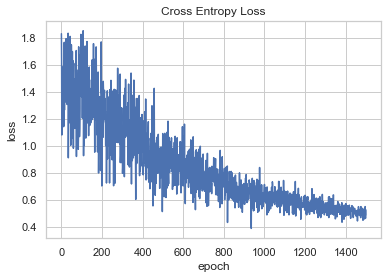

In [59]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()